In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
import os
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.features import SelectPFeatures
from src.features import FeaturePlots as fp


# Supervised, intrinsic feature selection

In [2]:
sf = SelectPFeatures()

## Load the data

In [3]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/p.train.csv')
test = pd.read_csv(f'{data_dir}/p.test.csv')

In [4]:
train.shape

(55622, 61)

In [5]:
train['station'].unique()

array(['YHB', 'YDC', 'YWB', 'MCID', 'YHL', 'YMR', 'YHH', 'B207', 'YPP',
       'YPM', 'YLT', 'QLMT', 'H17A', 'B208', 'LKWY', 'FLWY', 'YGC',
       'TPMT', 'YMC', 'YML', 'B206', 'B944', 'YLA', 'YUF', 'YTP', 'YNR',
       'YNM', 'YFT', 'YPC', 'YJC', 'YMS', 'YMV', 'B950', 'YDD'],
      dtype=object)

## Process the features

In [6]:
X_train, y_train, scaler, feature_names = sf.get_X_y(train, source_dist_type='all')

X shape: (55622, 47), y shape: (55622,)


In [7]:
print(feature_names)

['amp_ratio_1' 'amp_ratio_2' 'amp_ratio_3' 'amp_ratio_4' 'amp_ratio_5'
 'amp_ratio_6' 'amp_ratio_7' 'amp_ratio_8' 'amp_ratio_9' 'amp_ratio_10'
 'amp_ratio_11' 'amp_ratio_12' 'amp_ratio_13' 'amp_ratio_14'
 'amp_ratio_15' 'amp_ratio_16' 'amp_ratio_17' 'amp_ratio_18' 'amp_1'
 'amp_2' 'amp_3' 'amp_4' 'amp_5' 'amp_6' 'amp_7' 'amp_8' 'amp_9' 'amp_10'
 'amp_11' 'amp_12' 'amp_13' 'amp_14' 'amp_15' 'amp_16' 'amp_17' 'amp_18'
 'signal_dominant_frequency' 'signal_dominant_amplitude'
 'noise_max_amplitude' 'signal_max_amplitude' 'signal_variance'
 'noise_variance' 'source_depth_km' 'source_latitude' 'source_longitude'
 'source_receiver_distance_logkm' 'source_receiver_back_azimuth_sine']


In [8]:
alt_names = sf.make_feature_plot_names()
alt_names

['ratio 1',
 'ratio 2',
 'ratio 3',
 'ratio 4',
 'ratio 5',
 'ratio 6',
 'ratio 7',
 'ratio 8',
 'ratio 9',
 'ratio 10',
 'ratio 11',
 'ratio 12',
 'ratio 13',
 'ratio 14',
 'ratio 15',
 'ratio 16',
 'ratio 17',
 'ratio 18',
 'amp. 1',
 'amp. 2',
 'amp. 3',
 'amp. 4',
 'amp. 5',
 'amp. 6',
 'amp. 7',
 'amp. 8',
 'amp. 9',
 'amp. 10',
 'amp. 11',
 'amp. 12',
 'amp. 13',
 'amp. 14',
 'amp. 15',
 'amp. 16',
 'amp. 17',
 'amp. 18',
 'sig. dom. freq.',
 'sig. dom. amp.',
 'noise max. amp.',
 'sig. max. amp.',
 'sig. var.',
 'noise var.',
 'depth',
 'lat.',
 'long.',
 'distance',
 'back az.']

# Do the processing for each station

In [9]:
station_feature_dict, _ = sf.process_station_datasets(train, test)

YHB
X shape: (2920, 47), y shape: (2920,)
X shape: (734, 47), y shape: (734,)
YDC
X shape: (2509, 47), y shape: (2509,)
X shape: (645, 47), y shape: (645,)
YWB
X shape: (3069, 47), y shape: (3069,)
X shape: (786, 47), y shape: (786,)
MCID
X shape: (2942, 47), y shape: (2942,)
X shape: (771, 47), y shape: (771,)
YHL
X shape: (2739, 47), y shape: (2739,)
X shape: (682, 47), y shape: (682,)
YMR
X shape: (3393, 47), y shape: (3393,)
X shape: (845, 47), y shape: (845,)
YHH
X shape: (4005, 47), y shape: (4005,)
X shape: (1002, 47), y shape: (1002,)
B207
X shape: (1609, 47), y shape: (1609,)
X shape: (380, 47), y shape: (380,)
YPP
X shape: (1334, 47), y shape: (1334,)
X shape: (338, 47), y shape: (338,)
YPM
X shape: (3358, 47), y shape: (3358,)
X shape: (843, 47), y shape: (843,)
YLT
X shape: (1275, 47), y shape: (1275,)
X shape: (291, 47), y shape: (291,)
QLMT
X shape: (792, 47), y shape: (792,)
X shape: (190, 47), y shape: (190,)
H17A
X shape: (527, 47), y shape: (527,)
X shape: (142, 47), 

# Correlation matrix

Followed [this](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) example

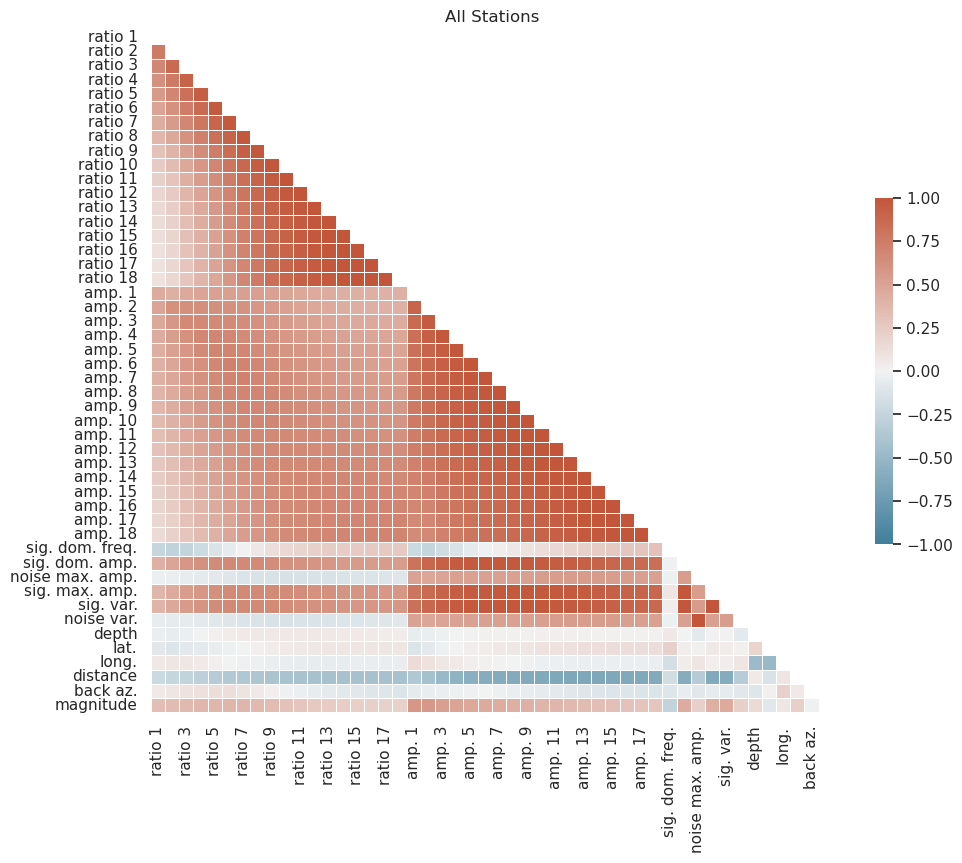

In [10]:
fp.plot_pairwise_correlations(X_train, 
                           y_train, 
                           alt_names, 
                           'All Stations')

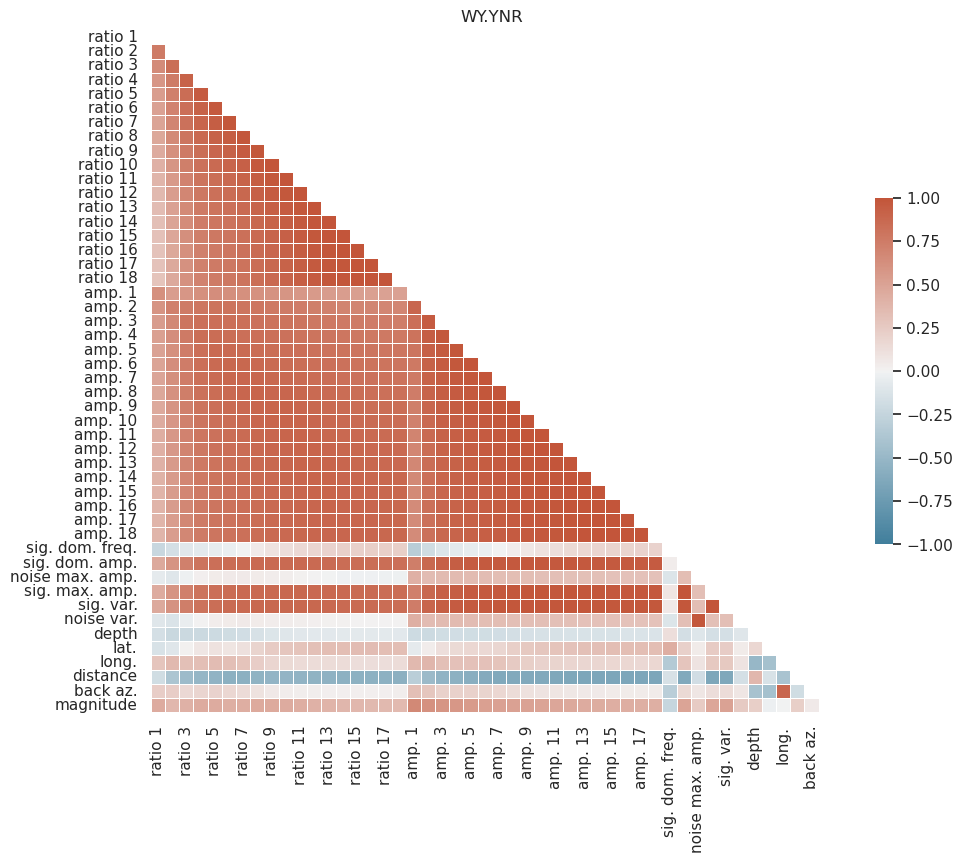

In [11]:
fp.plot_pairwise_correlations(station_feature_dict['YNR']['X_train'], 
                           station_feature_dict['YNR']['y_train'], 
                           alt_names, 
                           'WY.YNR')

## Look at the F-statistic of each feature to get a sense of which are the most important 

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [13]:
def f_reg_feature_selection(X, y):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    fs.transform(X)

    return fs

In [14]:
def compute_multiple_station_feature_scores(n_features, stat_feat_dict, fs_method):
    scores = np.full((n_features, len(stat_feat_dict.keys())), -1, dtype=float)
    station_order = []
    for i, station in enumerate(stat_feat_dict.keys()):
        fs = fs_method(stat_feat_dict[station]['X_train'],
                                stat_feat_dict[station]['y_train'])
        scores[:, i] = fs.scores_
        station_order.append(station)
    station_order = np.array(station_order)
    assert np.all(scores > -1)
    return scores, station_order

In [15]:
def plot_score_box_whisker(dists, title, xlabels, ylabel, sort_col_inds=None):
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    ax1.set_title(title)
    if sort_col_inds is not None:
        dists = dists[:, sort_col_inds]
        xlabels = np.array(xlabels)[sort_col_inds]
    ax1.boxplot(dists);
    ax1.set_xticks(np.arange(1, len(xlabels)+1), labels=xlabels, rotation=90, fontsize=8);
    ax1.set_ylabel(ylabel)

In [16]:
f_reg_scores, f_reg_station_order = compute_multiple_station_feature_scores(len(feature_names),
                                                                            station_feature_dict,
                                                                            f_reg_feature_selection)

In [17]:
f_reg_scores

array([[4.77815951e+02, 2.18395817e+02, 2.26723023e+02, ...,
        9.18826937e+01, 7.34593618e+01, 1.05253123e+02],
       [5.58167037e+02, 4.47762595e+02, 4.66426477e+02, ...,
        1.92152232e+02, 1.43421032e+02, 8.40781961e+01],
       [6.41256973e+02, 6.69816480e+02, 7.18506234e+02, ...,
        2.53237244e+02, 1.78294485e+02, 1.13430794e+02],
       ...,
       [1.07892759e+02, 7.26069854e+01, 6.04395733e+01, ...,
        5.70775545e-01, 9.56598041e+00, 1.67403028e+00],
       [1.31950250e+02, 1.18431305e+02, 1.69076072e+02, ...,
        3.64980174e+01, 4.50000212e+00, 7.35480524e+00],
       [2.46738051e+01, 1.13436762e+01, 3.94250555e-01, ...,
        6.57284991e-01, 1.86370354e+00, 3.91841221e+00]])

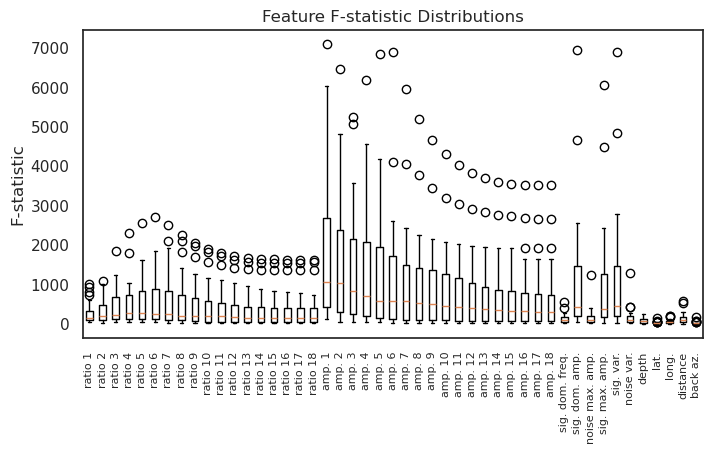

In [18]:
plot_score_box_whisker(f_reg_scores.T, 
                 'Feature F-statistic Distributions',
                 alt_names, 
                 'F-statistic')

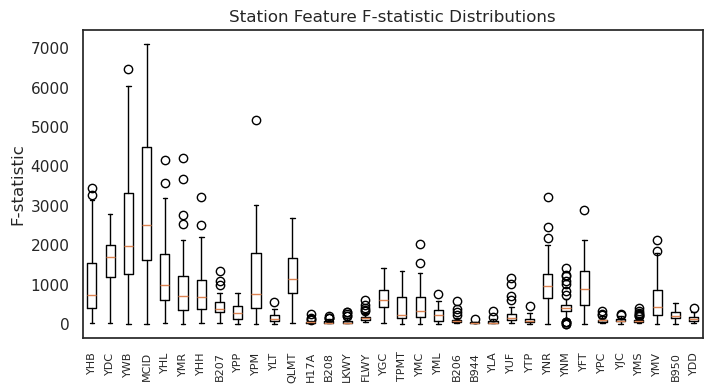

In [19]:
plot_score_box_whisker(f_reg_scores, 
                 'Station Feature F-statistic Distributions',
                 f_reg_station_order, 
                 'F-statistic')

In [20]:
def plot_station_score_bar_chart(scores, stat_order, stat, xlabels, ylabel):
    fig = plt.figure(figsize=(8, 4))
    s_scores = scores[:, np.where(stat_order == stat)[0][0]]
    plt.title(stat)
    plt.bar([i for i in range(len(s_scores))], s_scores)
    plt.xlim([-1, len(s_scores)])
    plt.xticks(np.arange(len(s_scores)), labels=xlabels, rotation=90, fontsize=8)
    plt.ylabel(ylabel)
    plt.show()

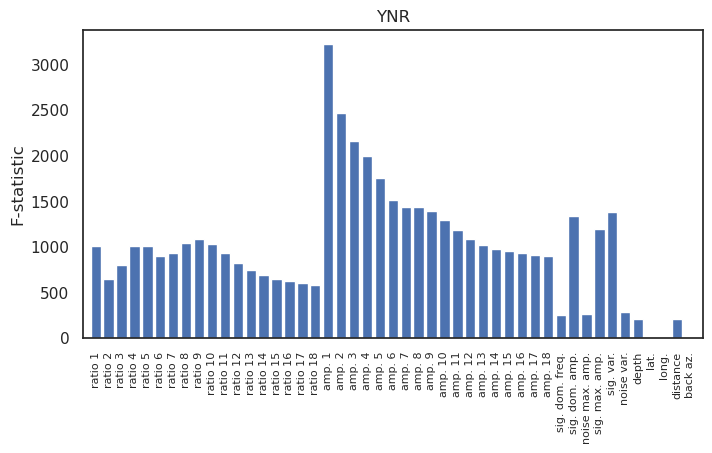

In [21]:
plot_station_score_bar_chart(f_reg_scores, 
                             f_reg_station_order,
                             'YNR',
                             alt_names,
                             'F-statistic')

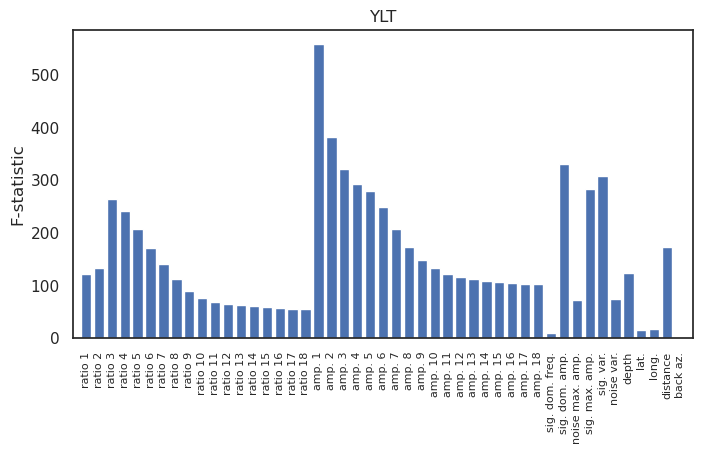

In [22]:
plot_station_score_bar_chart(f_reg_scores, 
                             f_reg_station_order,
                             'YLT',
                             alt_names,
                             'F-statistic')

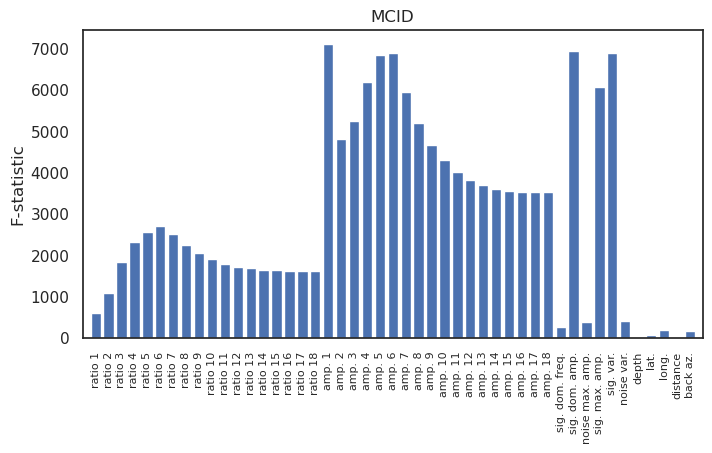

In [23]:
plot_station_score_bar_chart(f_reg_scores, 
                             f_reg_station_order,
                             'MCID',
                             alt_names,
                             'F-statistic')

In [24]:
def feature_rankings_for_individual_stations(scores):
    # Rankings in ascending order (lower number is more important feature)
    rankings = np.full_like(scores.T, -1, dtype='int')
    for stat_ind in range(scores.shape[1]):
        rankings[stat_ind, :] = np.argsort(-1*scores[:, stat_ind])

    return rankings

def rank_features_across_stations(scores, stat_rankings):
    feat_rankings = np.full_like(scores, -1, dtype='int')
    for feat_ind in range(stat_rankings.shape[1]):
        feat_rankings[feat_ind, :] = np.where(stat_rankings == feat_ind)[1]

    return feat_rankings

In [25]:
f_reg_stat_feat_rankings = feature_rankings_for_individual_stations(f_reg_scores)
f_reg_feat_rankings = rank_features_across_stations(f_reg_scores, f_reg_stat_feat_rankings)

In [26]:
assert np.array_equal(feature_names[np.argsort(-1*f_reg_scores[:, np.where(f_reg_station_order == 'YNR')[0][0]])],
                      feature_names[f_reg_stat_feat_rankings[np.where(f_reg_station_order == 'YNR')[0][0], :]]),\
                      'Feature ranking function did not work correctly'

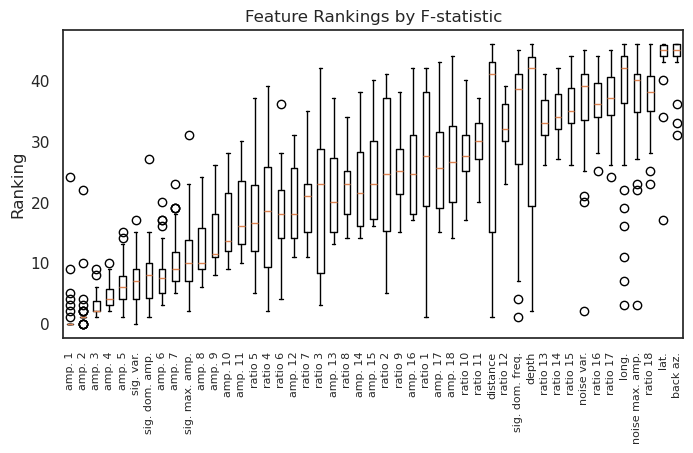

In [27]:
plot_score_box_whisker(f_reg_feat_rankings.T, 
                 'Feature Rankings by F-statistic',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(f_reg_feat_rankings, axis=1)))

In [28]:
f_reg_summary_rankings = feature_names[np.argsort(np.sum(f_reg_feat_rankings, axis=1))]

In [29]:
assert np.array_equal(feature_names[np.argsort(np.sum(f_reg_feat_rankings, axis=1))],
               feature_names[np.argsort(np.average(f_reg_feat_rankings, axis=1))]),\
               'Average and Sum or feature ranking do not produce the same order of features'

## Look at the mutual info of each feature to get a sense of which are the most important 

In [30]:
# Make boolean mask of whether features are discrete or not
# I don't think this is very important b/c I don't expect signal_dominant_freq to be 
# very well correlated anyway. That is the only feature getting set to discrete here. 
# I also tried making lat, lon, and depth discrete but then the MI calculation took forever
discrete_perc_thresh = 1
discrete_feat_bool = []
for i in range(len(feature_names)):
    n_uniq = np.unique(X_train[:, i]).shape[0]
    perc = (n_uniq/X_train.shape[0])*100
    print(f'{feature_names[i]} {perc:0.2f}')
    discrete = False
    if perc < discrete_perc_thresh:
        discrete = True
    discrete_feat_bool .append(discrete)

print(discrete_feat_bool)

amp_ratio_1 99.98
amp_ratio_2 99.98
amp_ratio_3 99.98
amp_ratio_4 99.98
amp_ratio_5 99.98
amp_ratio_6 99.98
amp_ratio_7 99.98
amp_ratio_8 99.98
amp_ratio_9 99.98
amp_ratio_10 99.98
amp_ratio_11 99.98
amp_ratio_12 99.98
amp_ratio_13 99.98
amp_ratio_14 99.98
amp_ratio_15 99.98
amp_ratio_16 99.98
amp_ratio_17 99.98
amp_ratio_18 99.98
amp_1 99.98
amp_2 99.98
amp_3 99.98
amp_4 99.98
amp_5 99.98
amp_6 99.98
amp_7 99.98
amp_8 99.98
amp_9 99.98
amp_10 99.98
amp_11 99.98
amp_12 99.98
amp_13 99.98
amp_14 99.98
amp_15 99.98
amp_16 99.98
amp_17 99.98
amp_18 99.98
signal_dominant_frequency 0.03
signal_dominant_amplitude 99.98
noise_max_amplitude 99.98
signal_max_amplitude 99.98
signal_variance 99.98
noise_variance 99.98
source_depth_km 2.16
source_latitude 3.45
source_longitude 4.81
source_receiver_distance_logkm 99.84
source_receiver_back_azimuth_sine 99.84
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [31]:
from sklearn.feature_selection import mutual_info_regression


In [32]:
def mutual_reg_feature_selection(X, y):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    fs.transform(X)
    
    return fs

In [33]:
# Function that will use the discrete mask - shouldn't really matter b/c only one
# discrete feature
def mi_discrete_features(X, y):
    return mutual_info_regression(X, y, discrete_features=discrete_feat_bool)

def mutual_reg_feature_selection_discrete(X, y):
    # configure to select all features
    fs = SelectKBest(score_func=mi_discrete_features, k='all')
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    fs.transform(X)
    
    return fs

In [34]:
# Using the discrete mask didn't change the results. 'Auto' setting may have already set it as discrete?
mutual_reg_scores, mutual_reg_station_order = compute_multiple_station_feature_scores(len(feature_names),
                                                                            station_feature_dict,
                                                                            mutual_reg_feature_selection_discrete)
                                                                            #mutual_reg_feature_selection)

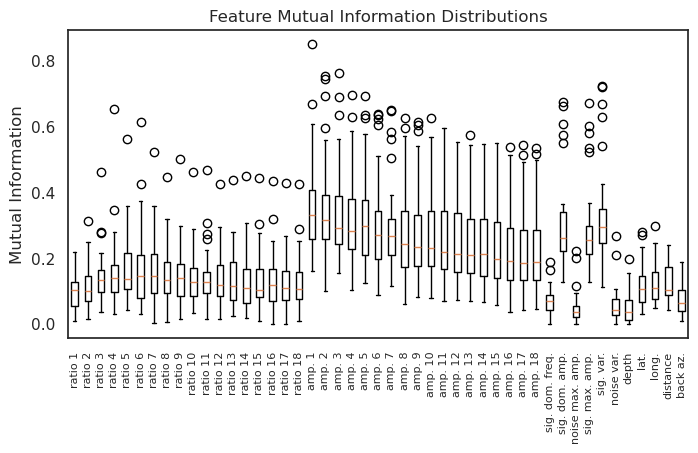

In [35]:
plot_score_box_whisker(mutual_reg_scores.T, 
                 'Feature Mutual Information Distributions',
                 alt_names, 
                 'Mutual Information')

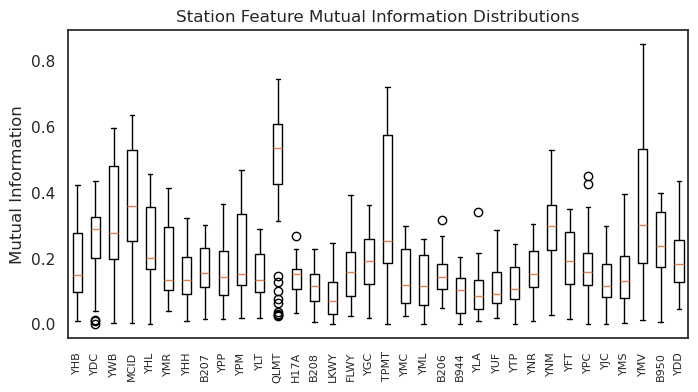

In [36]:
plot_score_box_whisker(mutual_reg_scores, 
                 'Station Feature Mutual Information Distributions',
                 mutual_reg_station_order, 
                 'Mutual Information')

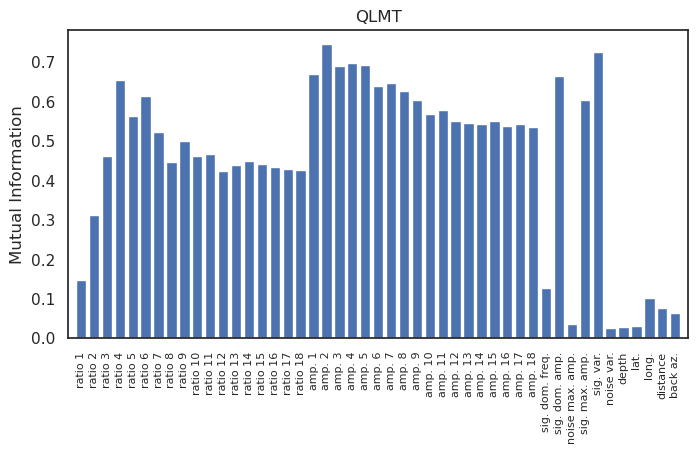

In [37]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'QLMT',
                             alt_names,
                             'Mutual Information')

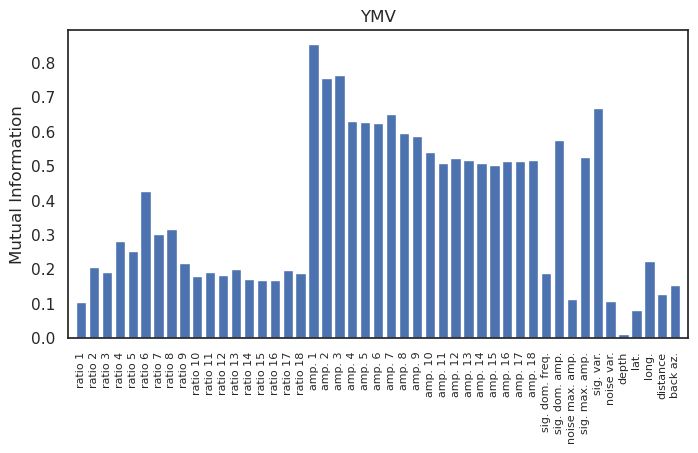

In [38]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'YMV',
                             alt_names,
                             'Mutual Information')

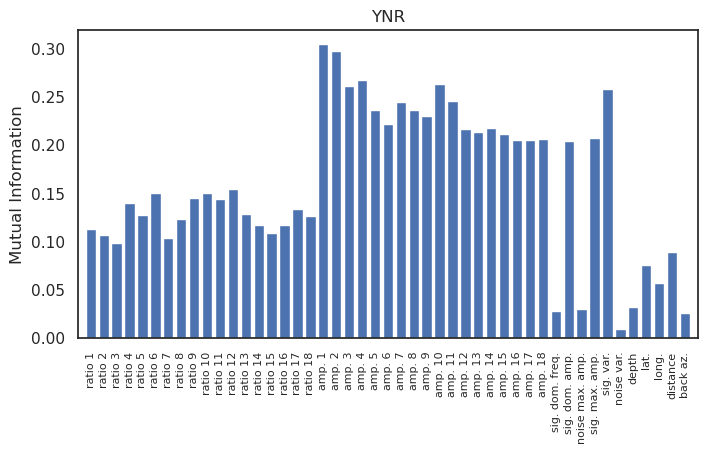

In [39]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'YNR',
                             alt_names,
                             'Mutual Information')

In [40]:
mutual_reg_stat_feat_rankings = feature_rankings_for_individual_stations(mutual_reg_scores)
mutual_reg_feat_rankings = rank_features_across_stations(mutual_reg_scores, mutual_reg_stat_feat_rankings)

In [41]:
assert np.array_equal(feature_names[np.argsort(-1*mutual_reg_scores[:, np.where(mutual_reg_station_order == 'YNR')[0][0]])],
                      feature_names[mutual_reg_stat_feat_rankings[np.where(mutual_reg_station_order == 'YNR')[0][0], :]]),\
                      'Feature ranking function did not work correctly'

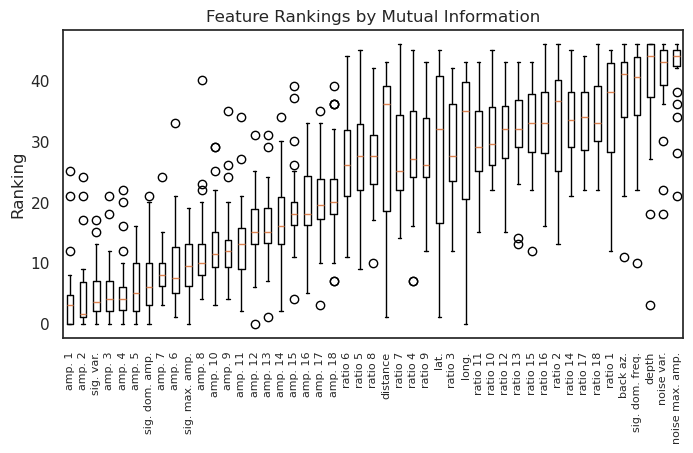

In [42]:
plot_score_box_whisker(mutual_reg_feat_rankings.T, 
                 'Feature Rankings by Mutual Information',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(mutual_reg_feat_rankings, axis=1)))

In [43]:
mutual_reg_summary_rankings = feature_names[np.argsort(np.sum(mutual_reg_feat_rankings, axis=1))]

# Who has Lat/Lon with a lot of mutual info?

In [60]:
np.where(np.isin(feature_names, ['source_latitude', 'source_longitude']))

(array([43, 44]),)

In [66]:
mutual_reg_station_order[np.unique(np.where(mutual_reg_feat_rankings[43:45, :] < 5)[1])]

array(['LKWY', 'YJC'], dtype='<U4')

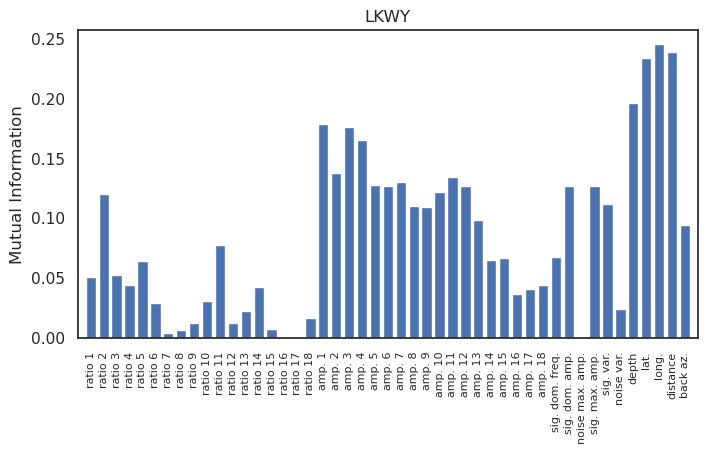

In [67]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'LKWY',
                             alt_names,
                             'Mutual Information')

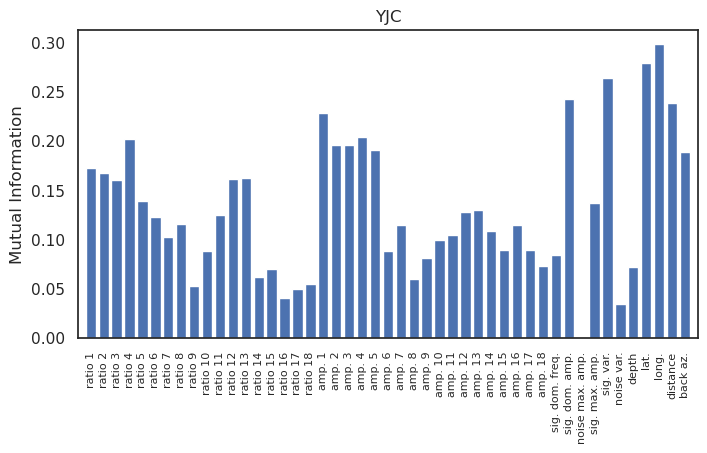

In [68]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'YJC',
                             alt_names,
                             'Mutual Information')

# SR-dist and back-azimuth?

In [70]:
feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km', 'source_latitude',
       'source_longitude', 'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_sine'], dtype='<U33')

In [71]:
np.where(np.isin(feature_names, ['source_receiver_distance_logkm', 'source_receiver_back_azimuth_sine']))

(array([45, 46]),)

In [75]:
np.unique(np.where(mutual_reg_feat_rankings[-1:, :] < 5)[1])

array([], dtype=int64)

In [77]:
np.unique(np.where(mutual_reg_feat_rankings[45:46, :] < 5)[1])

array([13, 14, 20, 22, 29])

In [72]:
mutual_reg_station_order[np.unique(np.where(mutual_reg_feat_rankings[45:47, :] < 5)[1])]

array(['B208', 'LKWY', 'B206', 'YLA', 'YJC'], dtype='<U4')

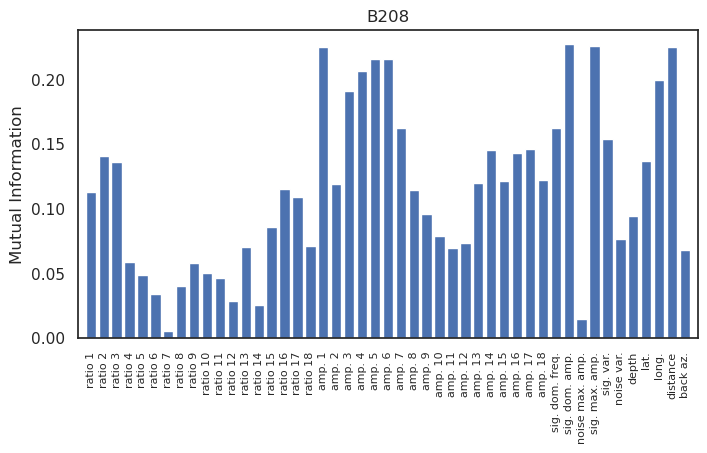

In [78]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'B208',
                             alt_names,
                             'Mutual Information')

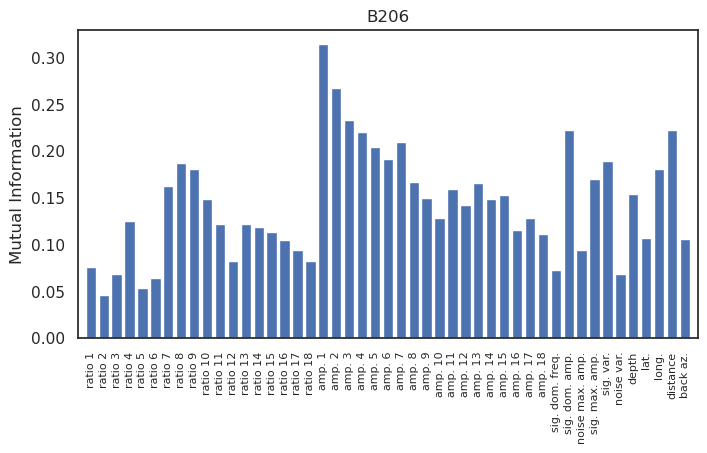

In [79]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'B206',
                             alt_names,
                             'Mutual Information')

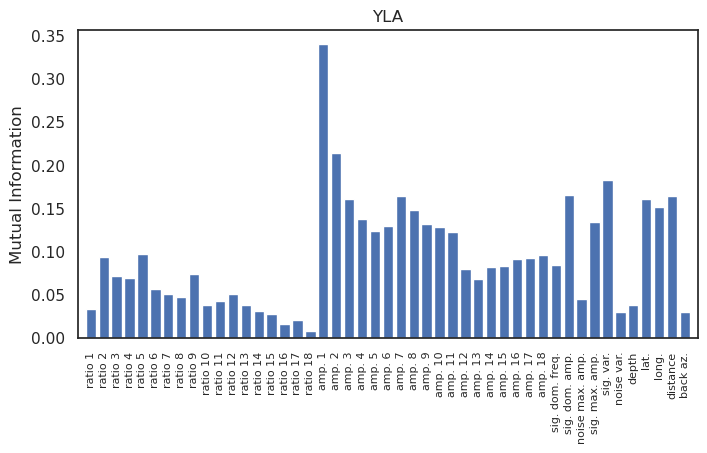

In [80]:
plot_station_score_bar_chart(mutual_reg_scores, 
                             mutual_reg_station_order,
                             'YLA',
                             alt_names,
                             'Mutual Information')

# Look at important features from both F-stat and Mutual Information next to each other

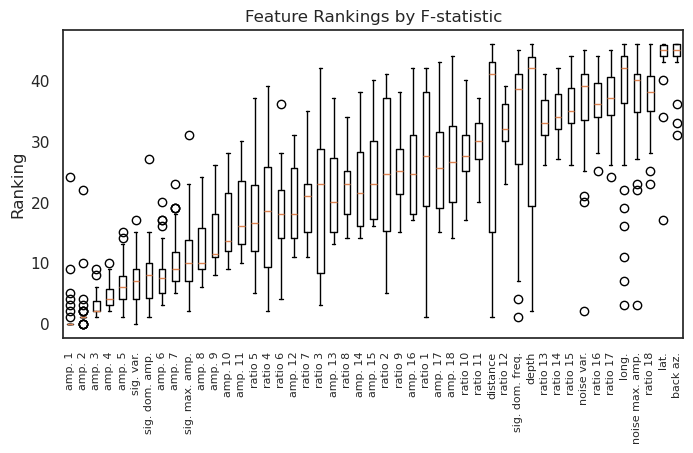

In [44]:
plot_score_box_whisker(f_reg_feat_rankings.T, 
                 'Feature Rankings by F-statistic',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(f_reg_feat_rankings, axis=1)))

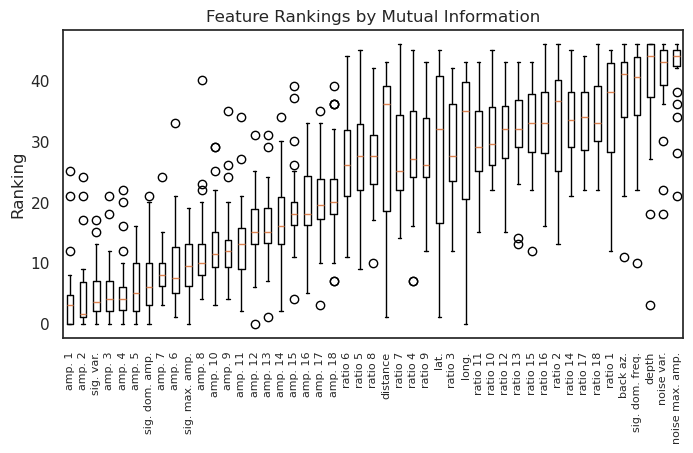

In [45]:
plot_score_box_whisker(mutual_reg_feat_rankings.T, 
                 'Feature Rankings by Mutual Information',
                 alt_names, 
                 'Ranking',
                 sort_col_inds=np.argsort(np.sum(mutual_reg_feat_rankings, axis=1)))

In [46]:
mutual_reg_summary_rankings

array(['amp_1', 'amp_2', 'signal_variance', 'amp_3', 'amp_4', 'amp_5',
       'signal_dominant_amplitude', 'amp_7', 'amp_6',
       'signal_max_amplitude', 'amp_8', 'amp_10', 'amp_9', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'amp_ratio_6', 'amp_ratio_5', 'amp_ratio_8',
       'source_receiver_distance_logkm', 'amp_ratio_7', 'amp_ratio_4',
       'amp_ratio_9', 'source_latitude', 'amp_ratio_3',
       'source_longitude', 'amp_ratio_11', 'amp_ratio_10', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_15', 'amp_ratio_16', 'amp_ratio_2',
       'amp_ratio_14', 'amp_ratio_17', 'amp_ratio_18', 'amp_ratio_1',
       'source_receiver_back_azimuth_sine', 'signal_dominant_frequency',
       'source_depth_km', 'noise_variance', 'noise_max_amplitude'],
      dtype='<U33')

In [47]:
f_reg_summary_rankings

array(['amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'signal_variance',
       'signal_dominant_amplitude', 'amp_6', 'amp_7',
       'signal_max_amplitude', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_ratio_5', 'amp_ratio_4', 'amp_ratio_6', 'amp_12',
       'amp_ratio_7', 'amp_ratio_3', 'amp_13', 'amp_ratio_8', 'amp_14',
       'amp_15', 'amp_ratio_2', 'amp_ratio_9', 'amp_16', 'amp_ratio_1',
       'amp_17', 'amp_18', 'amp_ratio_10', 'amp_ratio_11',
       'source_receiver_distance_logkm', 'amp_ratio_12',
       'signal_dominant_frequency', 'source_depth_km', 'amp_ratio_13',
       'amp_ratio_14', 'amp_ratio_15', 'noise_variance', 'amp_ratio_16',
       'amp_ratio_17', 'source_longitude', 'noise_max_amplitude',
       'amp_ratio_18', 'source_latitude',
       'source_receiver_back_azimuth_sine'], dtype='<U33')

Since amplitudes and amplitude ratios are highly correlated - focus on those with the most information w.r.t. magnitude

Amps: 1-5  
Ratio: 4-7  

Top 7 ratios   
Mutual: 6, 5, 8, 7, 4, 9, 3  
F-Stat: 5, 4, 6, 7, 3, 8, 2  


The issue with this though is that it is possible some of the other amps or ratios that are less relevant for magnitude by themselves, but they could be helpful when combined with other features.

In [48]:
feature_subset = ['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_variance',
'signal_dominant_amplitude', 'signal_max_amplitude','signal_dominant_frequency',
'noise_max_amplitude', 'noise_variance', 
'source_depth_km', 'source_latitude',
'source_longitude', 'source_receiver_distance_logkm',
'source_receiver_back_azimuth_sine']

In [49]:
feature_subset_cols = np.where(np.isin(feature_names, feature_subset))[0]
feature_subset_cols

array([ 3,  4,  5,  6, 18, 19, 20, 21, 22, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46])

In [50]:
np.array(alt_names)[feature_subset_cols]

array(['ratio 4', 'ratio 5', 'ratio 6', 'ratio 7', 'amp. 1', 'amp. 2',
       'amp. 3', 'amp. 4', 'amp. 5', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'lat.', 'long.', 'distance', 'back az.'], dtype='<U15')

In [51]:
X_train[:, feature_subset_cols].shape

(55622, 20)

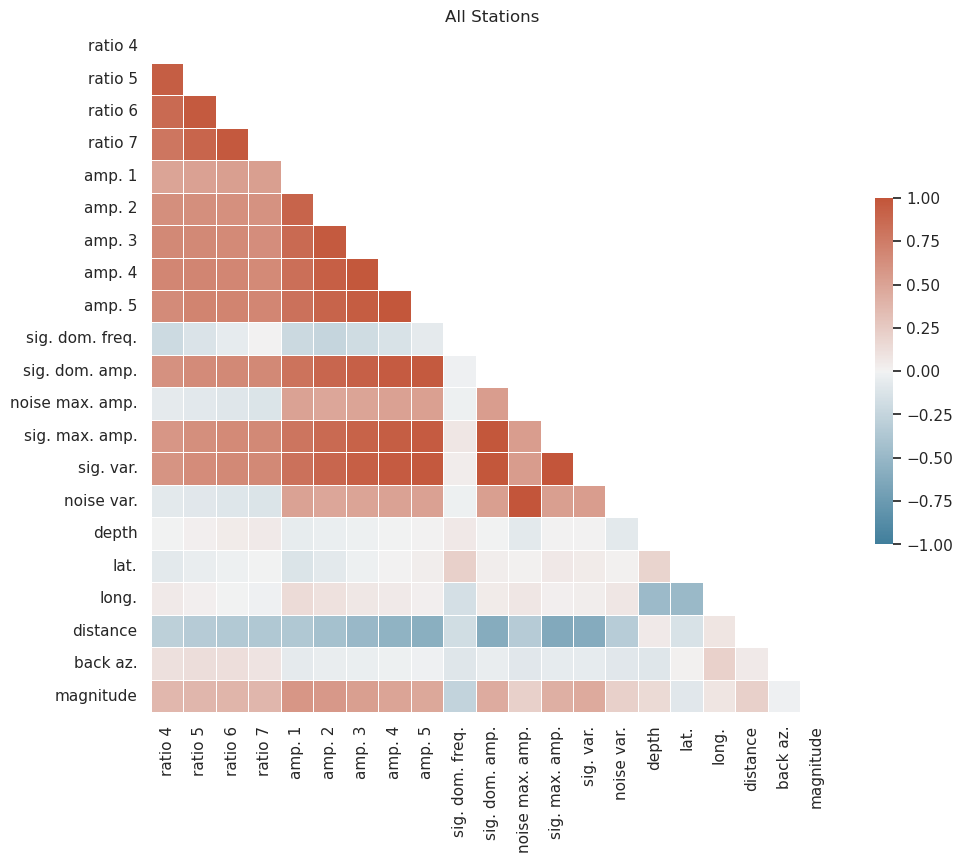

In [52]:
fp.plot_pairwise_correlations(X_train[:, feature_subset_cols], 
                           y_train, 
                           np.array(alt_names)[feature_subset_cols], 
                           'All Stations',
                           xticklabels=1)